**Predict survival on the Titanic**

In [242]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt 


**Load the Data**

In [243]:
#Importing Data Set
ds= pd.read_csv('/content/titanic_train.csv')

**View the data**

In [244]:
#View the data
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [245]:
#Statistical details of the dataset
ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Data Cleaning**

In [246]:
# check missing values in train data
ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [247]:
#remplace missing values with median
ds["Age"].fillna(ds["Age"].median(skipna=True), inplace=True)

In [248]:
#create categorical variables
gender=pd.get_dummies(ds['Sex'],drop_first=True)
ds['Sex']=gender

In [249]:
#remplace missing values with "S"
ds['Embarked'].fillna("S", inplace = True)
ds['Embarked'] = ds['Embarked'].replace(['S','C','Q'],[0,1,2])

In [250]:
## Categorizing titles
ds['Titles'] = ds['Name'].str.extract(r', (\w+\.)')

ds['Titles'] = ds['Titles'].replace(['Capt.', 'Col.',  'Don.',  'Dr.', 'Jonkheer.',  'Lady.',  'Major.',  'Master.',
                                           'Rev.',  'Sir.', np.nan] , 'Special')

ds['Titles'] = ds['Titles'].replace(['Mlle.','Mlle','Ms.','Miss.'],'Miss')
ds['Titles'] = ds['Titles'].replace(['Mme.','Mme','Mrs.'],'Mrs')
ds['Titles'] = ds['Titles'].replace('Mr.','Mr')
ds['Titles'] = ds['Titles'].replace(['Miss','Mrs','Mr','Special'],[0,1,2,3])

In [251]:
# Create categorical variable for traveling alone
ds['TravelAlone']=np.where((ds["SibSp"]+ds["Parch"])>0, 0, 1)

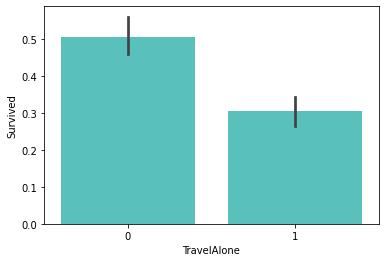

In [252]:
sns.barplot(x='TravelAlone', y='Survived', data=ds, color="mediumturquoise")
plt.show()

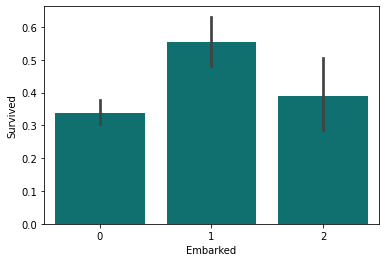

In [253]:
#Exploration of Embarked Port
sns.barplot(x='Embarked', y='Survived', data=ds, color="teal")
plt.show()

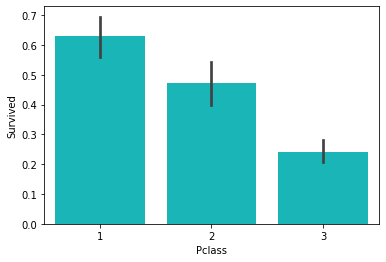

In [254]:
#Exploration of Passenger Class
sns.barplot(x='Pclass', y='Survived', data=ds, color="darkturquoise")
plt.show()

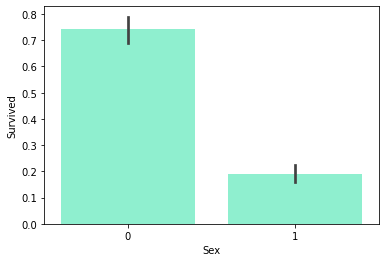

In [255]:
#Exploration of Gender Variable
sns.barplot(x='Sex', y='Survived', data=ds, color="aquamarine")
plt.show()

In [256]:
ds.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId','SibSp','Parch'], axis=1, inplace=True)

In [257]:
#View Data after cleaning
ds.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Titles,TravelAlone
0,0,3,1,22.0,7.2500,0,2,0
1,1,1,0,38.0,71.2833,1,1,0
2,1,3,0,26.0,7.9250,0,0,1
3,1,1,0,35.0,53.1000,0,1,0
4,0,3,1,35.0,8.0500,0,2,1


**Data Modelling**

In [258]:
#Divide the data into “attributes” and “labels”
X=ds.drop('Survived',axis=1) #separate the other attributes from the predicting attribute
y=ds['Survived']

In [269]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [ ]:
# Model initialization
LogisticReg_model = LogisticRegression()
# Fit the data(train the model)
LogisticReg_model.fit(X_train,y_train)

y_pred=LogisticReg_model.predict(X_test)

**Model Evaluation**

In [271]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.88268156424581
